In [48]:
from ib_insync import *
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
#import statsmodels
#import statsmodels.api as sm
#from statsmodels.tsa.stattools import coint, adfuller
#from statsmodels import regression,stats
import math
import datetime 
import statsmodels.formula.api as smf 
from datetime import date, time, datetime, timedelta
#from xml.etree import ElementTree as ET
#from IPython.core.debugger import set_trace
import seaborn as sns
import random
from ta import add_all_ta_features
from ta.utils import dropna
from ta.trend import *
from ib_insync.objects import AccountValue
from ib_insync.wrapper import Wrapper
from ib_insync.client import Client

## Technology sector (311)

In [175]:
with open("final_ind.txt") as f:
    content = f.readlines()

content = [x.strip() for x in content] 
content = content[1:-1]

In [176]:
content

['2021-04-14 09:31:00  Length of 418',
 '2021-04-14 09:31:00  Symbol AA R735QTJ8XC9X',
 '2021-04-14 09:31:00  Symbol AAL VM9RIYHM8ACL',
 '2021-04-14 09:31:00  Symbol AAWW TJ2ZLXWLWA5H',
 '2021-04-14 09:31:00  Symbol ABB S3MVQ2U3Z59H',
 '2021-04-14 09:31:00  Symbol AAN XIT9T96LYYJP',
 '2021-04-14 09:31:00  Symbol AAON R735QTJ8XC9X',
 '2021-04-14 09:31:00  Symbol ABFS R735QTJ8XC9X',
 '2021-04-14 09:31:00  Symbol ABM R735QTJ8XC9X',
 '2021-04-14 09:31:00  Symbol ACA WZ6AU4JF19B9',
 '2021-04-14 09:31:00  Symbol ABXA T8HXLRCAAB1H',
 '2021-04-14 09:31:00  Symbol ACM TSHPE3QO7TD1',
 '2021-04-14 09:31:00  Symbol ACP R735QTJ8XC9X',
 '2021-04-14 09:31:00  Symbol AEIS R735QTJ8XC9X',
 '2021-04-14 09:31:00  Symbol AG R735QTJ8XC9X',
 '2021-04-14 09:31:00  Symbol AER TNUBE7JZ7K2T',
 '2021-04-14 09:31:00  Symbol AGX TVC3VTS86A1X',
 '2021-04-14 09:31:00  Symbol AIR R735QTJ8XC9X',
 '2021-04-14 09:31:00  Symbol AIMC TOHY4GC11NXH',
 '2021-04-14 09:31:00  Symbol ALD R735QTJ8XC9X',
 '2021-04-14 09:31:00  Sym

In [177]:
content[-1]

'2021-04-15 09:31:00  Symbol WSO R735QTJ8XC9X'

In [178]:
np.shape(content)

(838,)

In [179]:
# number of tickers
n = content[0]
n = int(n[-4:])
n

418

In [180]:
# create a list of symbols
symbols = content[1:n+1]
for s in range(len(symbols)):
    ind = symbols[s].find("Symbol")
    symbols[s] = symbols[s][ind:].replace("Symbol ", "")

In [181]:
# find tickers
tickers = [x.split(" ")[0] for x in symbols]

In [182]:
len(tickers)

418

In [183]:
print(tickers)

['AA', 'AAL', 'AAWW', 'ABB', 'AAN', 'AAON', 'ABFS', 'ABM', 'ACA', 'ABXA', 'ACM', 'ACP', 'AEIS', 'AG', 'AER', 'AGX', 'AIR', 'AIMC', 'ALD', 'ALEX', 'ALLE', 'ALK', 'ALTG', 'AL', 'ALT', 'ALG', 'AMRC', 'ALGT', 'AME', 'ANDA', 'AMSC', 'APG', 'AQUA', 'APOG', 'AOS', 'ASGN', 'ARNC', 'ASR', 'ASTE', 'ASF', 'ATTO', 'AZEK', 'AUD', 'APZ', 'BA', 'ATKR', 'AWI', 'BAH', 'ASPN', 'BBSI', 'AZUL', 'BBU', 'ATRO', 'AYI', 'BE', 'AVAV', 'AZZ', 'BECN', 'B', 'AVY', 'BMI', 'BLD', 'BLDG', 'BRCOA', 'BLDPF', 'BLDR', 'BV', 'CASS', 'BWC', 'BWC', 'CAT', 'CBIZ', 'BXC', 'CGT', 'CAP', 'CATM', 'CEA', 'CCNI', 'CCRN', 'CHRW', 'CARR', 'CARRW', 'CMCO', 'CIR', 'CFX', 'CLHB', 'CNHI', 'CIX', 'CODI', 'CD', 'CNI', 'CSWIV', 'CR', 'CSX', 'CP', 'CRAI', 'CRS', 'CPA', 'CSL', 'DAC', 'CTAS', 'DAL', 'DCU', 'CUB', 'CWST', 'CSTE', 'CUM', 'CPRT', 'DHC', 'DE', 'CVTI', 'DY', 'CW', 'CYD', 'DCI', 'DOOR', 'EOSE', 'CYRX', 'DOV', 'EMR', 'DCO', 'EAF', 'EPAC', 'EFX', 'ENR', 'ERC', 'EAGL', 'ENS', 'ECHO', 'ETN', 'ECOL', 'EGLE', 'ESLTF', 'FAIL', 'EBF', 'FC

In [187]:
with open('tickers.txt', 'w') as filehandle:
    filehandle.write("['%s'" %tickers[0])
    for t in tickers[1:]:
        filehandle.write(", '%s'" % t)
    filehandle.write("]")

## Volatility: VIX

In [8]:
vix = pd.read_csv("^VIX.csv",header=None, names=['Dates','Open','High', 'Low', 'Close', 'Adj Close','Volume'])
vix = vix.drop([0])
vix = vix.drop(columns = ['Open', 'High','Low','Volume'])
Date = [datetime.strptime(t, "%Y-%m-%d") for t in list(vix.Dates)]
vix['Date'] = Date
vix = vix.set_index('Date')
vix = vix.drop(columns = ['Dates'])

In [9]:
v=vix.astype(float)

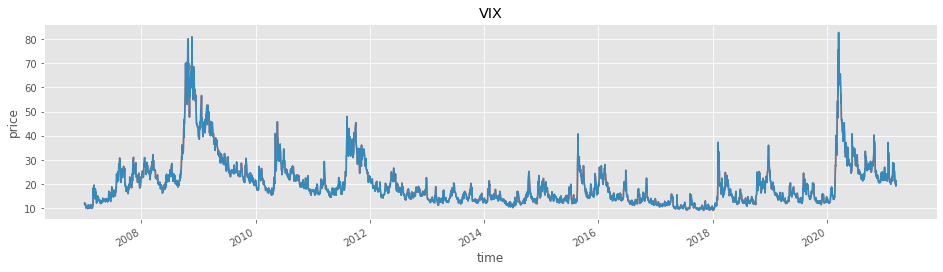

In [11]:
with plt.style.context('ggplot'):
    ax = v.plot(kind= 'line', figsize=(16,4), title='VIX', legend = False, grid = True)
    ax.set(xlabel='time',ylabel = 'price')
    ax.set(xlabel='time',ylabel = 'price')

In [29]:
v.loc['2019':]

,Close,Adj Close
Date,,
2019-01-02,23.219999,23.219999
2019-01-03,25.450001,25.450001
2019-01-04,21.379999,21.379999
2019-01-07,21.400000,21.400000
2019-01-08,20.469999,20.469999
...,...,...
2021-03-15,20.030001,20.030001
2021-03-16,19.790001,19.790001
2021-03-17,19.230000,19.230000


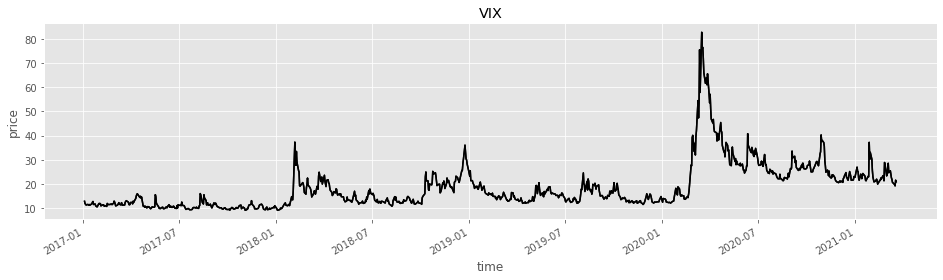

In [30]:
with plt.style.context('ggplot'):
    ax = v.loc['2017':].plot(kind= 'line', figsize=(16,4), 
                                   title='VIX', legend = False, grid = True, color='black')
    ax.set(xlabel='time',ylabel = 'price')

In smaple: 2017-07-01, 2018-07-01
Out sample: 2019-08-01, 2020-08-01
stress test: 2020-03

## Get daily prices

In [180]:
# Connect to IB Server
ib=IB()
util.startLoop()
ib.connect('127.0.0.1',7497, clientId= 5)

<IB connected to 127.0.0.1:7497 clientId=5>

In [182]:
#define a function to get IB data.
def get_data(contract, history, freq, side, endDate =''):
    '''
    This function gets the IB data for given contract, with certain frequency.
    Input: contract(asset), history(duration), freq(resolution), side('Trades' or 'Ask' or 'Bid'), 
    endDate(the last date of historical data)
    Output: dataframe
    '''
    
    bar = ib.reqHistoricalData(
        contract,
        endDateTime = endDate,
        durationStr=history,
        barSizeSetting= freq,
        whatToShow=side,
        useRTH=True,
        formatDate=1)
    
    # use util in ib-insync to convert bar data into pandas dataframe    
    df = util.df(bar)
 
    return df

In [176]:
# set attributes
history = '2 Y'
freq = '1 day'
side ='Trades' 
endDate_tr_high_vol = "20100101 23:59:59"

In [193]:
# create contracts
contracts = []
for i in tickers:
    c = Contract(symbol = i, secType = 'STK', exchange = 'SMART',currency = 'USD')
    if ib.qualifyContracts(c) != []:
        contracts.append(c)

Error 200, reqId 12: No security definition has been found for the request, contract: Contract(secType='STK', symbol='ACXM', exchange='SMART', currency='USD')
Unknown contract: Contract(secType='STK', symbol='ACXM', exchange='SMART', currency='USD')
Error 200, reqId 13: No security definition has been found for the request, contract: Contract(secType='STK', symbol='ADDM', exchange='SMART', currency='USD')
Unknown contract: Contract(secType='STK', symbol='ADDM', exchange='SMART', currency='USD')
Error 200, reqId 15: No security definition has been found for the request, contract: Contract(secType='STK', symbol='ADGE', exchange='SMART', currency='USD')
Unknown contract: Contract(secType='STK', symbol='ADGE', exchange='SMART', currency='USD')
Error 200, reqId 23: No security definition has been found for the request, contract: Contract(secType='STK', symbol='AHA', exchange='SMART', currency='USD')
Unknown contract: Contract(secType='STK', symbol='AHA', exchange='SMART', currency='USD')
Er

Unknown contract: Contract(secType='STK', symbol='FLEXF', exchange='SMART', currency='USD')
Error 200, reqId 211: No security definition has been found for the request, contract: Contract(secType='STK', symbol='EMA', exchange='SMART', currency='USD')
Unknown contract: Contract(secType='STK', symbol='EMA', exchange='SMART', currency='USD')
Error 200, reqId 213: No security definition has been found for the request, contract: Contract(secType='STK', symbol='GART', exchange='SMART', currency='USD')
Unknown contract: Contract(secType='STK', symbol='GART', exchange='SMART', currency='USD')
Error 200, reqId 219: No security definition has been found for the request, contract: Contract(secType='STK', symbol='GGNT', exchange='SMART', currency='USD')
Unknown contract: Contract(secType='STK', symbol='GGNT', exchange='SMART', currency='USD')
Error 200, reqId 228: No security definition has been found for the request, contract: Contract(secType='STK', symbol='GMHI', exchange='SMART', currency='USD

Unknown contract: Contract(secType='STK', symbol='MLCH', exchange='SMART', currency='USD')
Error 200, reqId 387: No security definition has been found for the request, contract: Contract(secType='STK', symbol='OCCF', exchange='SMART', currency='USD')
Unknown contract: Contract(secType='STK', symbol='OCCF', exchange='SMART', currency='USD')
Error 200, reqId 389: No security definition has been found for the request, contract: Contract(secType='STK', symbol='NVMM', exchange='SMART', currency='USD')
Unknown contract: Contract(secType='STK', symbol='NVMM', exchange='SMART', currency='USD')
Error 200, reqId 391: No security definition has been found for the request, contract: Contract(secType='STK', symbol='OTEXF', exchange='SMART', currency='USD')
Unknown contract: Contract(secType='STK', symbol='OTEXF', exchange='SMART', currency='USD')
Error 200, reqId 396: No security definition has been found for the request, contract: Contract(secType='STK', symbol='NVTL', exchange='SMART', currency='

Unknown contract: Contract(secType='STK', symbol='TSEMF', exchange='SMART', currency='USD')
Error 200, reqId 564: No security definition has been found for the request, contract: Contract(secType='STK', symbol='TSRA', exchange='SMART', currency='USD')
Unknown contract: Contract(secType='STK', symbol='TSRA', exchange='SMART', currency='USD')
Error 200, reqId 572: No security definition has been found for the request, contract: Contract(secType='STK', symbol='UBNT', exchange='SMART', currency='USD')
Unknown contract: Contract(secType='STK', symbol='UBNT', exchange='SMART', currency='USD')
Error 200, reqId 587: No security definition has been found for the request, contract: Contract(secType='STK', symbol='VSCI', exchange='SMART', currency='USD')
Unknown contract: Contract(secType='STK', symbol='VSCI', exchange='SMART', currency='USD')
Error 200, reqId 591: No security definition has been found for the request, contract: Contract(secType='STK', symbol='VSNR', exchange='SMART', currency='U

In [194]:
len(contracts)

510

In [196]:
contracts[0]

Contract(secType='STK', conId=265598, symbol='AAPL', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS')

In [197]:
df = get_data(contracts[0], history, freq, side, endDate_tr_high_vol)

In [198]:
# dataframe
data = []
for i in range(len(contracts)):
    df = get_data(contracts[i], history, freq, side, endDate_tr_high_vol)
    data.append(df)

Error 162, reqId 632: Historical Market Data Service error message:HMDS query returned no data: AAOI@SMART Trades, contract: Contract(secType='STK', conId=135423662, symbol='AAOI', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AAOI', tradingClass='NMS')
Error 162, reqId 633: Historical Market Data Service error message:HMDS query returned no data: ACLS@SMART Trades, contract: Contract(secType='STK', conId=239037320, symbol='ACLS', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='ACLS', tradingClass='NMS')
Error 162, reqId 635: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND, LTSE, MEMX, NYSE, NYSENAT, PEARL, PSX STK, contract: Contract(secType='STK', conId=49919952, symbol='ABST', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='ABST', tradingClass='NMS')
Error 162, reqId 636: Historical Market Data Service error message:HM

Error 162, reqId 675: Historical Market Data Service error message:HMDS query returned no data: ATC@SMART Trades, contract: Contract(secType='STK', conId=469015099, symbol='ATC', exchange='SMART', primaryExchange='NYSE', currency='USD', localSymbol='ATC', tradingClass='ATC')
Error 162, reqId 676: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND, LTSE, MEMX, NYSE, NYSENAT, PEARL, PSX STK, contract: Contract(secType='STK', conId=300355239, symbol='AVYA', exchange='SMART', primaryExchange='NYSE', currency='USD', localSymbol='AVYA', tradingClass='AVYA')
Error 162, reqId 678: Historical Market Data Service error message:HMDS query returned no data: ATMR@SMART Trades, contract: Contract(secType='STK', conId=478440542, symbol='ATMR', exchange='SMART', primaryExchange='NYSE', currency='USD', localSymbol='ATMR', tradingClass='ATMR')
Error 162, reqId 679: Historical Market Data Service error message:HMDS que

Error 162, reqId 718: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND, LTSE, MEMX, NYSE, NYSENAT, PEARL, PSX STK, contract: Contract(secType='STK', conId=264212902, symbol='CETXP', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='CETXP', tradingClass='SCM')
Error 162, reqId 719: Historical Market Data Service error message:HMDS query returned no data: CEY@SMART Trades, contract: Contract(secType='STK', conId=293893527, symbol='CEY', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='CEY', tradingClass='NMS')
Error 162, reqId 720: Historical Market Data Service error message:HMDS query returned no data: CDW@SMART Trades, contract: Contract(secType='STK', conId=130432552, symbol='CDW', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='CDW', tradingClass='NMS')
Error 162, reqId 723: Historical Market Data Service error message:No ma

Error 162, reqId 768: Historical Market Data Service error message:HMDS query returned no data: DOX@SMART Trades, contract: Contract(secType='STK', conId=4457288, symbol='DOX', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='DOX', tradingClass='NMS')
Error 162, reqId 770: Historical Market Data Service error message:HMDS query returned no data: ENV@SMART Trades, contract: Contract(secType='STK', conId=77595036, symbol='ENV', exchange='SMART', primaryExchange='NYSE', currency='USD', localSymbol='ENV', tradingClass='ENV')
Error 162, reqId 771: Historical Market Data Service error message:HMDS query returned no data: CXDO@SMART Trades, contract: Contract(secType='STK', conId=88383076, symbol='CXDO', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='CXDO', tradingClass='SCM')
Error 162, reqId 772: Historical Market Data Service error message:HMDS query returned no data: ECOM@SMART Trades, contract: Contract(secType='STK', conId=128300574, sym

Error 162, reqId 820: Historical Market Data Service error message:HMDS query returned no data: FN@SMART Trades, contract: Contract(secType='STK', conId=76615083, symbol='FN', exchange='SMART', primaryExchange='NYSE', currency='USD', localSymbol='FN', tradingClass='FN')
Error 162, reqId 821: Historical Market Data Service error message:HMDS query returned no data: GLOB@SMART Trades, contract: Contract(secType='STK', conId=160756766, symbol='GLOB', exchange='SMART', primaryExchange='NYSE', currency='USD', localSymbol='GLOB', tradingClass='GLOB')
Error 162, reqId 822: Historical Market Data Service error message:HMDS query returned no data: GRMN@SMART Trades, contract: Contract(secType='STK', conId=76791198, symbol='GRMN', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='GRMN', tradingClass='NMS')
Error 162, reqId 824: Historical Market Data Service error message:HMDS query returned no data: FSLY@SMART Trades, contract: Contract(secType='STK', conId=366131373, sym

Error 162, reqId 884: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND, LTSE, MEMX, NYSE, NYSENAT, PEARL, PSX STK, contract: Contract(secType='STK', conId=28408008, symbol='INTZ', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='INTZ', tradingClass='SCM')
Error 162, reqId 886: Historical Market Data Service error message:HMDS query returned no data: KN@SMART Trades, contract: Contract(secType='STK', conId=143926983, symbol='KN', exchange='SMART', primaryExchange='NYSE', currency='USD', localSymbol='KN', tradingClass='KN')
Error 162, reqId 890: Historical Market Data Service error message:HMDS query returned no data: MRIN@SMART Trades, contract: Contract(secType='STK', conId=290651452, symbol='MRIN', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='MRIN', tradingClass='NMS')
Error 162, reqId 891: Historical Market Data Service error message:No market d

Error 162, reqId 932: Historical Market Data Service error message:HMDS query returned no data: OLO@SMART Trades, contract: Contract(secType='STK', conId=476856761, symbol='OLO', exchange='SMART', primaryExchange='NYSE', currency='USD', localSymbol='OLO', tradingClass='OLO')
Error 162, reqId 935: Historical Market Data Service error message:HMDS query returned no data: MTSI@SMART Trades, contract: Contract(secType='STK', conId=104158272, symbol='MTSI', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='MTSI', tradingClass='NMS')
Error 162, reqId 936: Historical Market Data Service error message:HMDS query returned no data: NET@SMART Trades, contract: Contract(secType='STK', conId=382633646, symbol='NET', exchange='SMART', primaryExchange='NYSE', currency='USD', localSymbol='NET', tradingClass='NET')
Error 162, reqId 937: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND, LTSE, 

Error 162, reqId 977: Historical Market Data Service error message:HMDS query returned no data: RBCN@SMART Trades, contract: Contract(secType='STK', conId=275211621, symbol='RBCN', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='RBCN', tradingClass='SCM')
Error 162, reqId 980: Historical Market Data Service error message:HMDS query returned no data: PTC@SMART Trades, contract: Contract(secType='STK', conId=121507047, symbol='PTC', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='PTC', tradingClass='NMS')
Error 162, reqId 982: Historical Market Data Service error message:HMDS query returned no data: PCTY@SMART Trades, contract: Contract(secType='STK', conId=146404668, symbol='PCTY', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='PCTY', tradingClass='NMS')
Error 162, reqId 984: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND,

Error 162, reqId 1027: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND, LTSE, MEMX, NYSE, NYSENAT, PEARL, PSX STK, contract: Contract(secType='STK', conId=123624285, symbol='RSSS', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='RSSS', tradingClass='SCM')
Error 162, reqId 1029: Historical Market Data Service error message:HMDS query returned no data: SANM@SMART Trades, contract: Contract(secType='STK', conId=117032813, symbol='SANM', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='SANM', tradingClass='NMS')
Error 162, reqId 1030: Historical Market Data Service error message:HMDS query returned no data: RUN@SMART Trades, contract: Contract(secType='STK', conId=202225016, symbol='RUN', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='RUN', tradingClass='NMS')
Error 162, reqId 1031: Historical Market Data Service error message:

Error 162, reqId 1072: Historical Market Data Service error message:HMDS query returned no data: TLS@SMART Trades, contract: Contract(secType='STK', conId=455969680, symbol='TLS', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='TLS', tradingClass='NMS')
Error 162, reqId 1074: Historical Market Data Service error message:No market data permissions for ARCAEDGE STK, contract: Contract(secType='STK', conId=310284884, symbol='TRTC', exchange='SMART', primaryExchange='PINK', currency='USD', localSymbol='TRTC', tradingClass='PRIMQX')
Error 162, reqId 1075: Historical Market Data Service error message:HMDS query returned no data: SSNC@SMART Trades, contract: Contract(secType='STK', conId=73911494, symbol='SSNC', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='SSNC', tradingClass='NMS')
Error 162, reqId 1076: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND

Error 162, reqId 1118: Historical Market Data Service error message:API historical data query cancelled: 1118, contract: Contract(secType='STK', conId=445554157, symbol='VNT', exchange='SMART', primaryExchange='NYSE', currency='USD', localSymbol='VNT', tradingClass='VNT')
Error 162, reqId 1120: Historical Market Data Service error message:HMDS query returned no data: VCRA@SMART Trades, contract: Contract(secType='STK', conId=105069647, symbol='VCRA', exchange='SMART', primaryExchange='NYSE', currency='USD', localSymbol='VCRA', tradingClass='VCRA')
Error 162, reqId 1124: Historical Market Data Service error message:HMDS query returned no data: YEXT@SMART Trades, contract: Contract(secType='STK', conId=272561934, symbol='YEXT', exchange='SMART', primaryExchange='NYSE', currency='USD', localSymbol='YEXT', tradingClass='YEXT')
Error 162, reqId 1125: Historical Market Data Service error message:No market data permissions for AMEX, ARCA, BATS, BEX, BYX, CHX, DRCTEDGE, EDGEA, IEX, ISLAND, LTS

In [201]:
data[0].T

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
date,2009-10-05,2009-10-06,2009-10-07,2009-10-08,2009-10-09,2009-10-12,2009-10-13,2009-10-14,2009-10-15,2009-10-16,...,2009-12-17,2009-12-18,2009-12-21,2009-12-22,2009-12-23,2009-12-24,2009-12-28,2009-12-29,2009-12-30,2009-12-31
open,6.65,6.705,6.775,6.815,6.75,6.825,6.805,6.865,6.775,6.76,...,6.935,6.9,7,7.125,7.185,7.27,7.56,7.595,7.46,7.61
high,6.675,6.785,6.805,6.835,6.81,6.84,6.825,6.87,6.82,6.8,...,6.965,6.98,7.135,7.175,7.23,7.475,7.64,7.595,7.57,7.62
low,6.58,6.69,6.75,6.745,6.735,6.775,6.775,6.795,6.77,6.71,...,6.85,6.88,6.99,7.095,7.17,7.26,7.485,7.455,7.44,7.52
close,6.645,6.785,6.795,6.76,6.805,6.815,6.785,6.83,6.805,6.715,...,6.85,6.98,7.08,7.155,7.22,7.465,7.56,7.47,7.56,7.525
volume,3998484,5220460,4467652,4029396,2703484,2597308,2644348,3476816,3306772,3937332,...,3546116,5395796,3805648,3303104,3275300,4783716,6043100,4128516,3848796,3169796
average,6.63971,6.74782,6.77718,6.79814,6.78604,6.80673,6.79413,6.82929,6.79025,6.74718,...,6.88475,6.92236,7.08214,7.13652,7.20634,7.41227,7.57496,7.50698,7.51945,7.5607
barCount,79612,103769,92931,80819,56274,52185,57370,69998,70375,77066,...,65726,89225,73938,63521,60447,86052,104496,73276,70550,60779
